In [7]:
import requests
import json
import time
import itertools
import wget
import os
import pickle
import numpy as np
import tmdbsimple as tmdb
import imdb
import time
import sys

import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import precision_recall_curve
import scipy

sns.set_style('white')
import tensorflow as tf
import pandas as pd
import keras
from imdb import IMDb
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as k
from keras.models import load_model

### Acquiring Genre From IMDB :


<br>

In [3]:
# Create an IMDB object
ia = IMDb()

# Initiate the genre List
g_imdb = []

# initiate counters
i, idm = 0, 0

while i < 100 :
    
    
    
    # Specify the movie id
    movie = str(35000 + idm)
    
    # get the movie 
    mv = ia.get_movie(movie)
    
    # Pause
    time.sleep(1)
    
    # Check the country
    if mv['country'][0] == 'USA':
        
        
        # Append the genre
        g_imdb.append(mv['genre'])
        
        # increase the counter
        i += 1
    
    # increase the id index
    idm += 1
    
    # print output result
    sys.stdout.flush()
    sys.stdout.write("\r genre current length: {}  movie id: {}".format(i , 35000 + idm))

 genre current length: 100  movie id: 35173

#### Cleaning and re-arranging

In [4]:
# Construct a list of ascii characters:
# -------------------------------------

# initiate the list
imdb_list = []

# Loop over the length of the acquired genres
for g in g_imdb:
    
    # Select the movies with more than one genre
    if len(g)>=2:
        
        # intiate the individual movie gene list
        mv = []
        
        # Extract the ascii genre
        for i in range(len(g)):
            
            # Append to the movie genre list
            mv.append(str(g[i]))
        
        # Append to the imddb list
        imdb_list.append(mv)
          

### Acquiring from TMDB:


<br>

In [5]:
# Accessing the TMDB
tmdb.API_KEY = '95b208af4c92eb1ddd5c831f91c84e15'

# Initiate the genre List
g_tmdb = []

# initiate counters
i = 0

while i < 100 :
    
    # Specify the movie id
    movie = 750+ i
    
    # get the movie 
    mv = tmdb.Movies(movie)
    response = mv.info()
    
    # Pause
    time.sleep(0.5)
    
    # Append the genre
    g_tmdb.append(mv.genres)
        
    # increase the counter
    i += 1
    
    # output result
    sys.stdout.write('\r genre length : {}  movie id : {}'.format(i , movie))

 genre length : 100  movie id : 849

#### Cleaning and re-arranging

In [6]:
# Construct a list of ascii characters:
# -------------------------------------

# initiate the list
tmdb_list = []

# Loop over the length of the acquired genres
for g in g_tmdb:
    
    # Select the movies with more than one genre
    if len(g)>=2:
        
        # intiate the individual movie gene list
        mv = []
        
        # Extract the ascii genre
        for i in range(len(g)):
            
            # Append to the movie genre list
            mv.append(str(g[i]['name']))
        
        # Append to the imddb list
        tmdb_list.append(mv)
          

### Merging Both and construct a unique array of genres:


<br>

In [7]:
# Merging Both Lists
# ------------------

# Initiate the merged array
genre_list = []

# Adding the IMBD list items
for gi in imdb_list:
    
    # Append to the merged list
    genre_list.append(gi)
    
# Adding the TMDB list items
for gt in tmdb_list:
    
    # Append to the merged list
    genre_list.append(gt)

In [8]:
# Construct an aggregated array of genres:
# ---------------------------------------

# initiate the overall list of all aggregated genres (to extract the unique array)
longlist = []

# Iterrate over the length of the transformed list
for lst in genre_list:
    
    # iterrate for each item in each individual list
    for i in range(len(lst)):
        
        # Append to the original list
        longlist.append(lst[i])

# Construct a unique array:
#--------------------------

# Construct the unique vector
unique_genre = np.unique(np.array(longlist))

# Length of the unique genre array
L = len(unique_genre)

In [9]:
print unique_genre

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'Film-Noir' 'Foreign' 'History'
 'Horror' 'Music' 'Musical' 'Mystery' 'Romance' 'Sci-Fi' 'Science Fiction'
 'Short' 'Sport' 'Thriller' 'War' 'Western']


### Constructing the genre doubles matrix :


<br>

In [10]:
# Function to define the indices of the genres in the Matrix
# -----------------------------------------------------------

def genre_couple(genre1 , genre2):
    
    # Search for match
    for i , gen in enumerate(unique_genre):
        
        # Look for first one
        if gen == genre1:
            
            # get the index
            a = i
            
        # Look for Second one    
        if gen ==genre2:
            
            # Get the index
            b = i
            
    return a,b
    
   

In [11]:
# Building the Matrix:
# -------------------

# Initiate the matrix
Genre_Matrix = np.zeros((L,L))

# Analyze each movie entry
for mov in genre_list:
    
    # length of the genre labels
    lgen = len(mov)
    
    # Select couples of movies
    for i in range(lgen - 1):
        
        # Select the second genre
        for j in range(i+1 , lgen):
            
            # Extract the indices in the Genre Matrix
            x , y = genre_couple(mov[i] , mov[j])
            
            # Add a frequency count to the Matrix
            Genre_Matrix[x,y] += 1
            
# Genrate a frequency based probability
Genre = Genre_Matrix / np.sum(Genre_Matrix)


### Produce the Vizualization

<br>

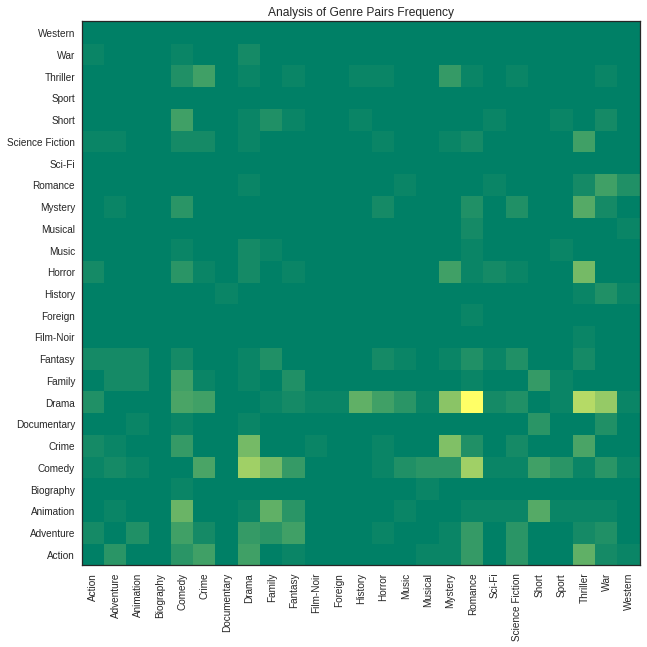

In [12]:
# Build a heatmap figure

fig = plt.figure (figsize = (10,10))
ind = np.arange(L)
width = 0.5
c_map = plt.get_cmap('summer')

# Generate the heatmap

ax1 = fig.add_subplot(1,1,1)
ax1.pcolor(Genre , cmap = c_map)
ax1.set_title('Analysis of Genre Pairs Frequency')
ax1.set_xticks(ind + width)
ax1.set_yticks(ind + width)
ax1.set_xticklabels(unique_genre , rotation = 'vertical')
ax1.set_yticklabels(unique_genre)

plt.show()

#### Observations:

<br>
    - If more than two ratings were assigned to the movie, each individual pair is considered
    - The most paired genres are "Drama" and "Romance"
    - "Film-Noir" is rarely rated and hence not paired quiet often